In [1]:
import matplotlib.pyplot as plt
from plotting_functions.plotting_structure import combine_experiments
from plotting_functions.boxplots import boxplot_at_molt, boxplot_larval_stage
from plotting_functions.proportions import (
    plot_correlation,
    plot_correlation_at_ecdysis,
    plot_deviation_from_model,
    plot_deviation_from_model_at_ecdysis,
    plot_normalized_proportions_at_ecdysis,
    plot_model_comparison_at_ecdysis,
)
import warnings

# Configure warnings
warnings.filterwarnings("once")

In [2]:
filemap_paths = [
    "/mnt/towbin.data/shared/kstojanovski/20240202_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240202_171239_051/analysis_sacha/report/analysis_filemap_annotated.csv",
    # "/mnt/towbin.data/shared/kstojanovski/20240212_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240212_164059_429/analysis_sacha/report/analysis_filemap_annotated.csv",
]

conditions_paths = [
    "/mnt/towbin.data/shared/kstojanovski/20240202_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240202_171239_051/doc/conditions.yaml",
    # "/mnt/towbin.data/shared/kstojanovski/20240212_Orca_10x_yap-1del_col-10-tir_wBT160-186-310-337-380-393_25C_20240212_164059_429/doc/conditions.yaml",
]

organ_channels = [{'body': 'ch2', 'pharynx' : 'ch1'}]
# 

# backup_path = "/mnt/towbin.data/shared/igheor/20250208_Ti2_10x_suppressor_screen_daf16_160_186_344_338_25C_20250208_204911_158/plotting_backups/"

# filemap_backup_path = os.path.join(backup_path, "filemaps")
# conditions_backup_path = os.path.join(backup_path, "conditions")
# structure_backup_path = os.path.join(backup_path, "structure")

# os.makedirs(backup_path, exist_ok=True)
# os.makedirs(filemap_backup_path, exist_ok=True)
# os.makedirs(conditions_backup_path, exist_ok=True)
# os.makedirs(structure_backup_path, exist_ok=True)

In [3]:
import pickle
conditions_struct = combine_experiments(filemap_paths, conditions_paths, organ_channels=organ_channels, recompute_values_at_molt=False)

# # backup the conditions struct
# with open(os.path.join(structure_backup_path, "plotting_struct.pkl"), "wb") as f:
#     pickle.dump(conditions_struct, f)

In [4]:
for condition in conditions_struct:
    print(f"Condition: {condition['condition_id'], {condition['description']}}, Number of individuals: {condition['ecdysis_time_step'].shape[0]}")

Condition: (0, {'WT yap-1, no TIR, 500uM IAA'}), Number of individuals: 31
Condition: (1, {'WT yap-1, col-10:TIR, 500uM IAA'}), Number of individuals: 24
Condition: (2, {'yap-1 (tm1416), no TIR, 500uM IAA'}), Number of individuals: 55
Condition: (3, {'yap-1 (tm1416), col-10:TIR, 500uM IAA'}), Number of individuals: 51
Condition: (4, {'yap-1 (abt7), no TIR, 500uM IAA'}), Number of individuals: 48
Condition: (5, {'yap-1 (abt7), col-10:TIR, 500uM IAA'}), Number of individuals: 95


In [5]:
# change figure size to your liking
plt.rcParams['figure.figsize'] = [12, 10]

# make lines thicker
plt.rcParams['lines.linewidth'] = 2

# make font size bigger
plt.rcParams.update({'font.size': 12})

In [6]:
# define colors for each condition
colors = {
    0: '#02d3f4', # light blue
    1: '#045561', # dark blue
    2: '#70f221', # light green
    3: '#316411', # dark green
    4: '#ff2727', # light red
    5: '#a91d1d', # dark red
}

## yap-1 mutant's growth gets slowed down more under col-10:TIR raga-1:AID

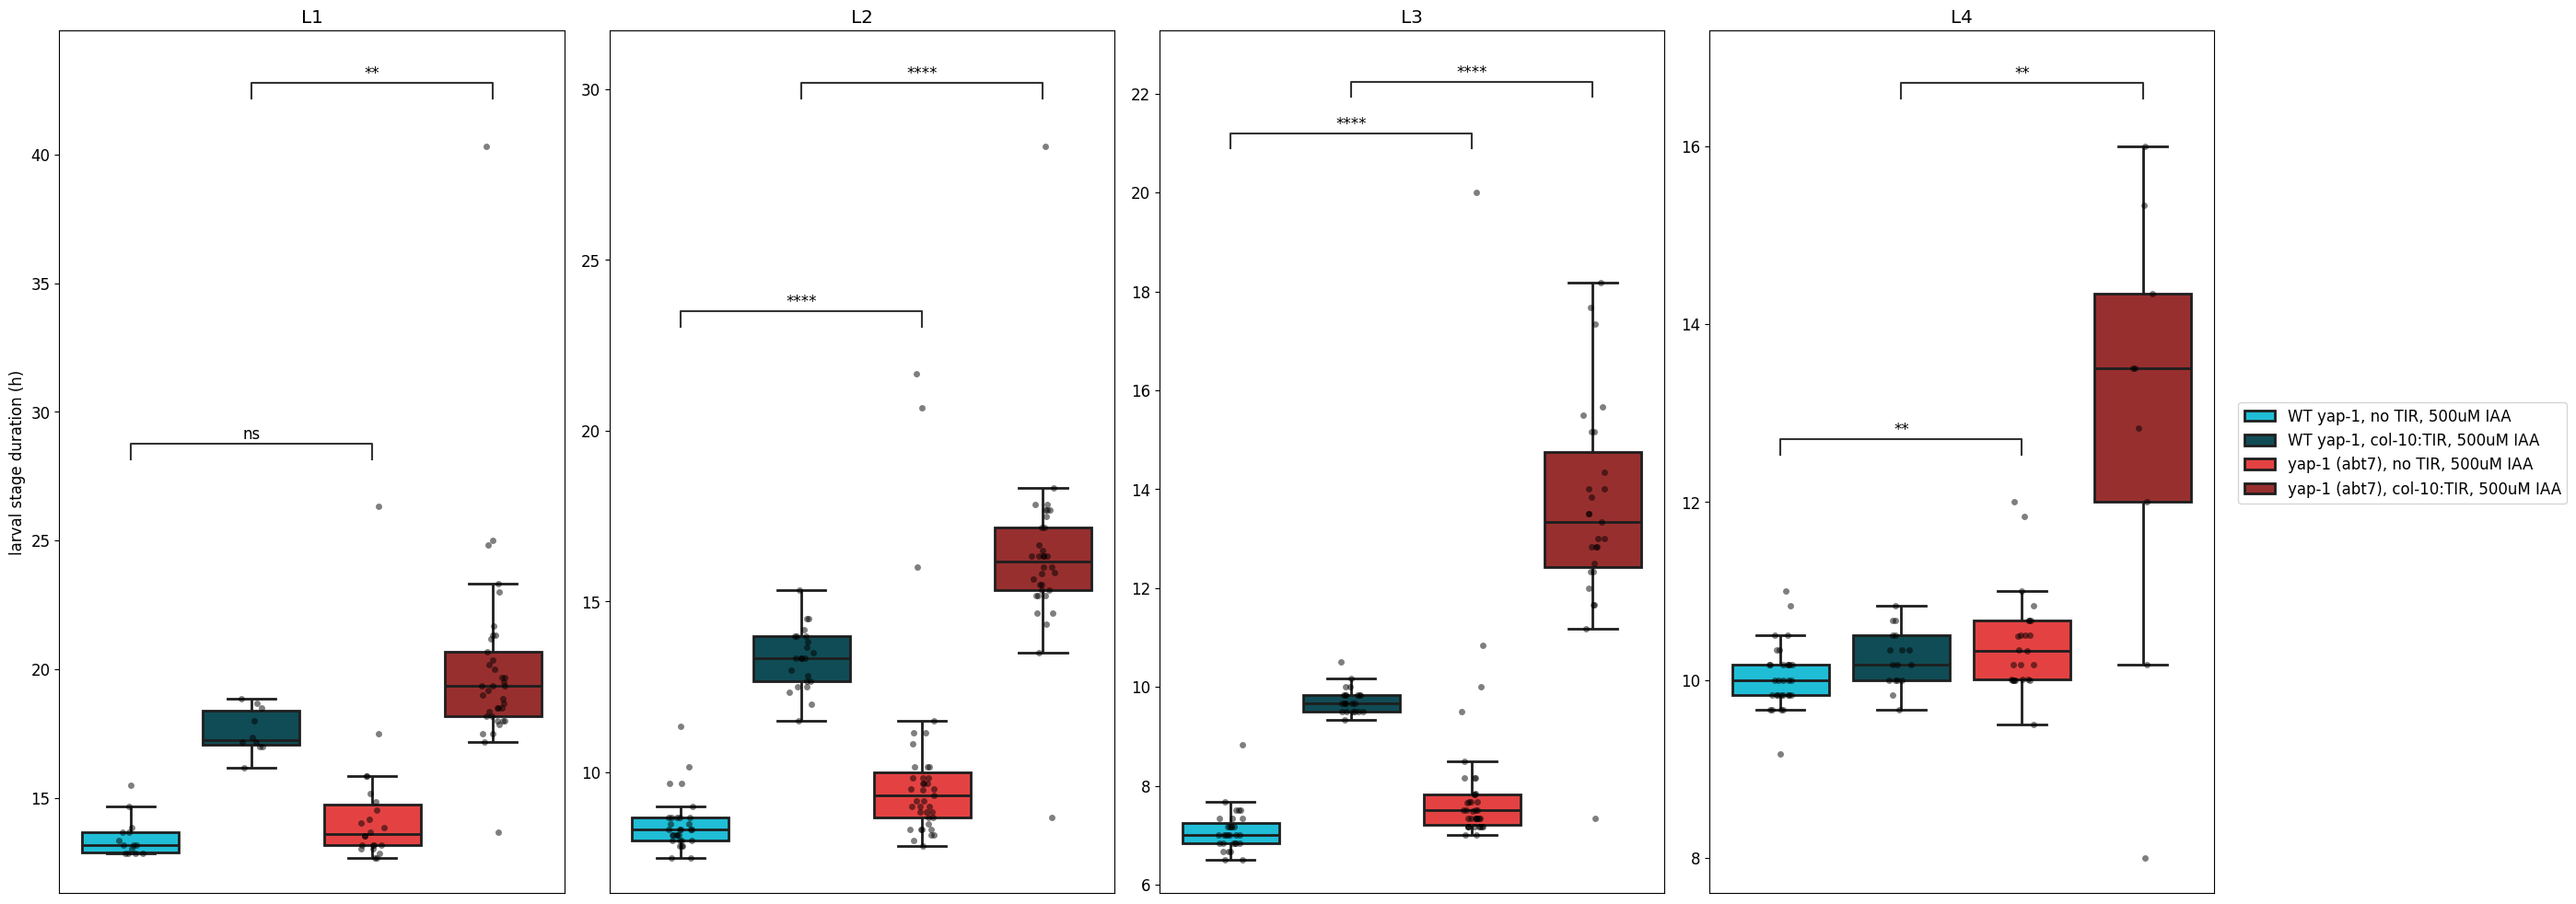

In [7]:
conditions_to_plot = [0, 1, 4, 5]
significance_pairs = [(0, 4), (1,5)]
fig = boxplot_at_molt(conditions_struct, 'larval_stage_durations_experiment_time_hours', conditions_to_plot, colors=colors, share_y_axis=False, plot_significance=True, significance_pairs = significance_pairs, log_scale = False, legend = {'description': ''}, y_axis_label='larval stage duration (h)', titles = ['L1', 'L2', 'L3', 'L4'])

## yap-1 mutation causes dumpiness, amplified by epidermal growth inhibition

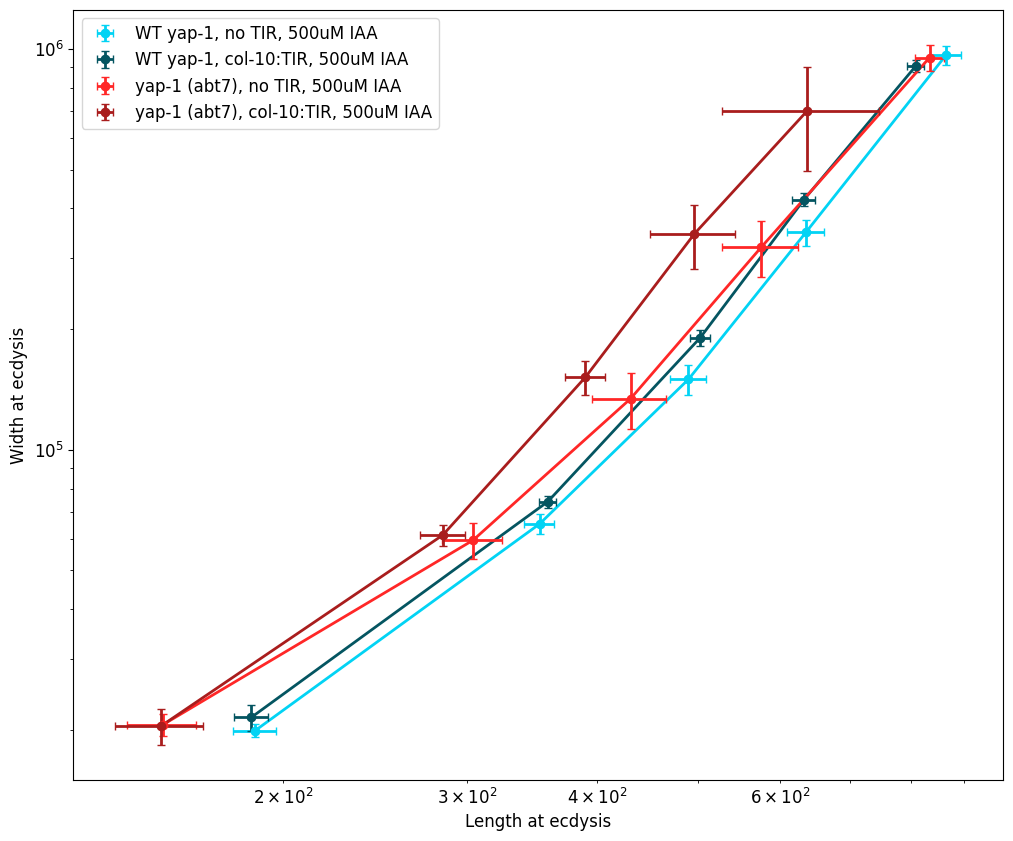

In [8]:
fig = plot_correlation_at_ecdysis(
    conditions_struct,
    "body_seg_str_length_at_ecdysis",
    "body_seg_str_volume_at_ecdysis",
    conditions_to_plot,
    remove_hatch=False,
    colors=colors,
    log_scale=(True, True),
    legend={"description": ""},
    y_axis_label="Width at ecdysis",
    x_axis_label="Length at ecdysis",
)

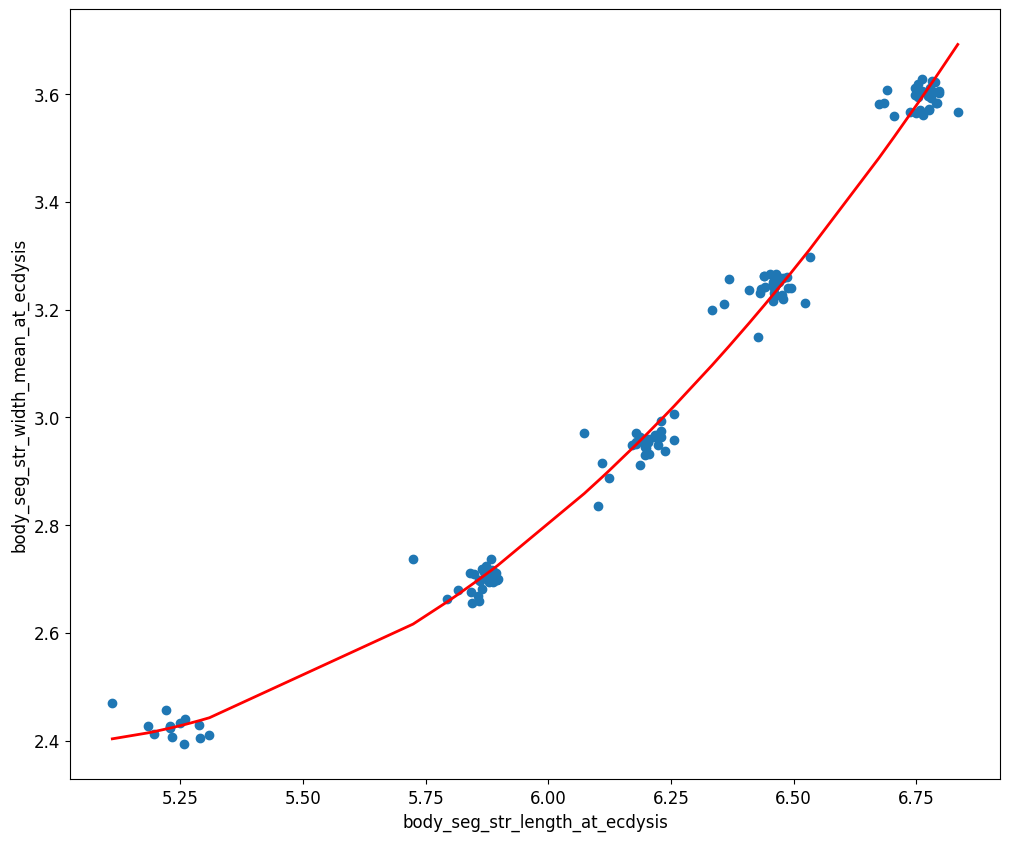

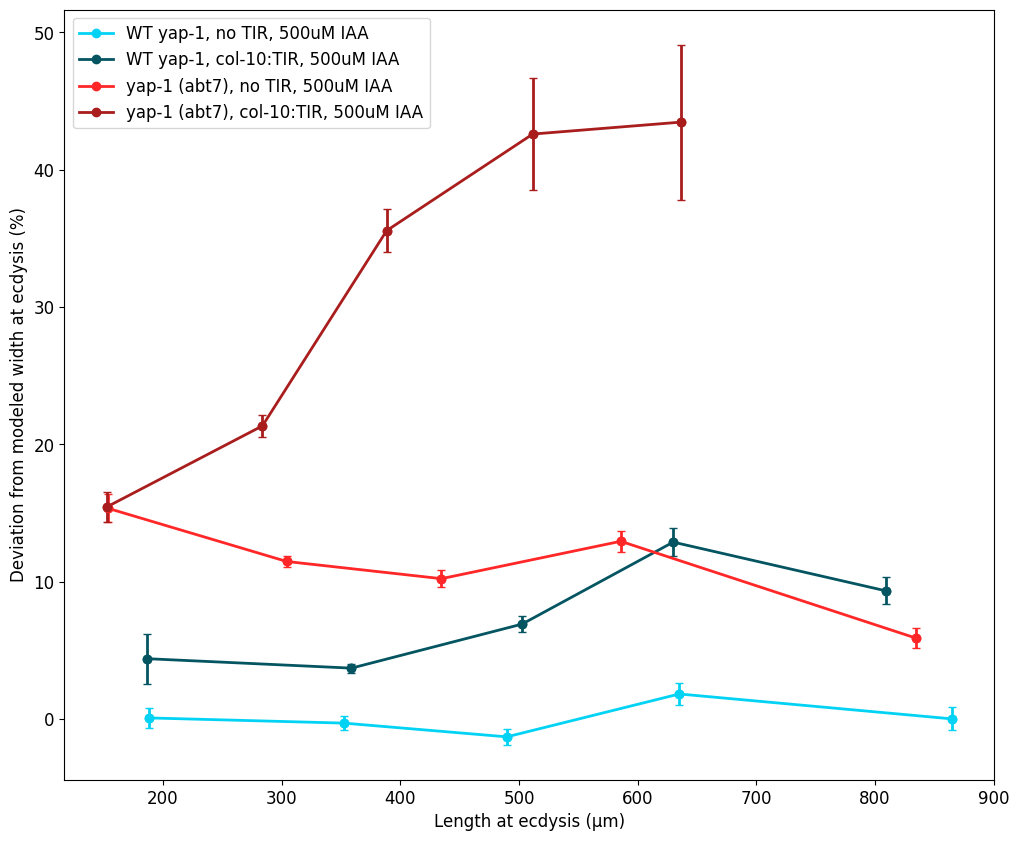

In [9]:
control_condition = 0
fig = plot_deviation_from_model_at_ecdysis(
    conditions_struct,
    "body_seg_str_length_at_ecdysis",
    "body_seg_str_width_mean_at_ecdysis",
    control_condition,
    conditions_to_plot,
    colors=colors,
    remove_hatch=False,
    exclude_arrests=True,
    log_scale=False,
    legend={"description": ""},
    x_axis_label="Length at ecdysis (µm)",
    y_axis_label="Deviation from modeled width at ecdysis (%)",
    poly_degree=2,
)

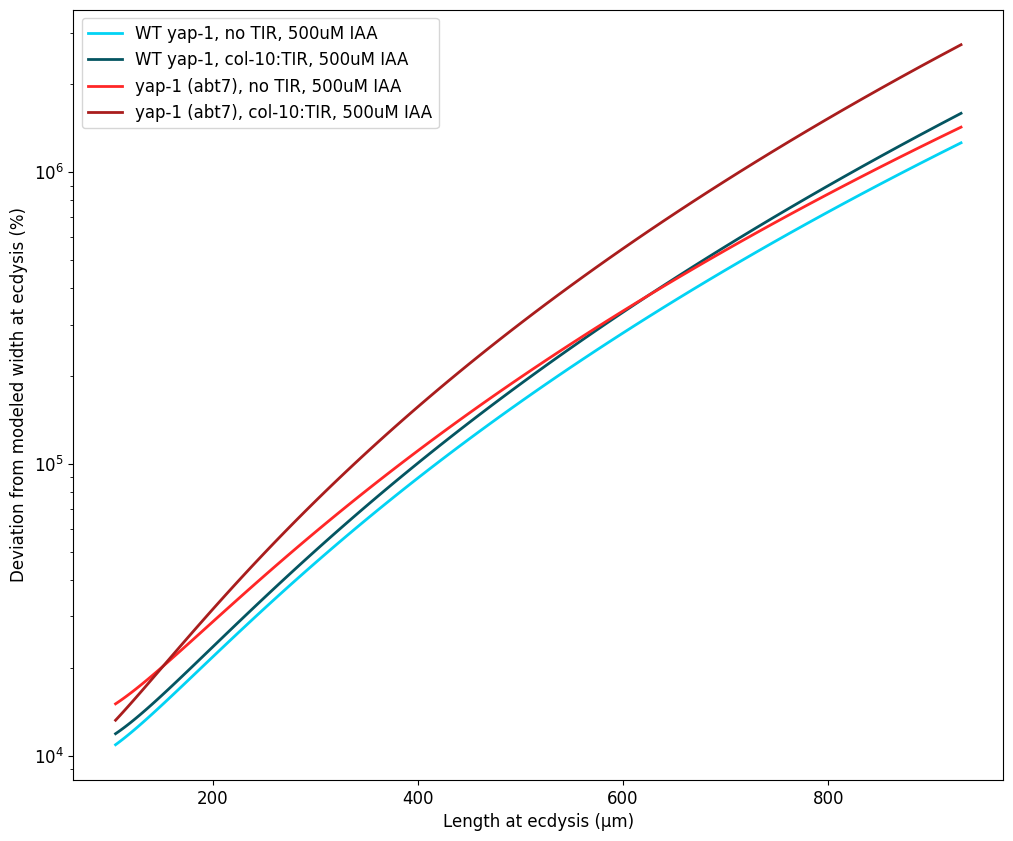

In [13]:
fig = plot_model_comparison_at_ecdysis(
    conditions_struct,
    "body_seg_str_length_at_ecdysis",
    "body_seg_str_volume_at_ecdysis",
    control_condition,
    conditions_to_plot,
    colors=colors,
    remove_hatch=False,
    exclude_arrests=True,
    log_scale=(False, True),
    legend={"description": ""},
    x_axis_label="Length at ecdysis (µm)",
    y_axis_label="Deviation from modeled width at ecdysis (%)",
    poly_degree=2,
)